<a href="https://colab.research.google.com/github/Rogerio-mack/fNIRS/blob/main/fnirs_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sumário

Captura e inspeção de dados brutos de fNIRS dos dados em Excel.



# Mount Google Drive

Para acesso aos arquivos compartilhados. Tenha certeza de ter adicionado a pasta compartilhada ao seu Google Drive antes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Common Imports

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import compress



# Read `xlsx` file





In [4]:
file_in = '/content/drive/MyDrive/fNIRS - análises compartilhadas/6. Dados extraídos.xlsx'


In [5]:
df = pd.read_excel(file_in)

In [6]:
df.head()

,Time,MD_HbO1_1,MD_HbR1_1,MD_HbT1_1,MD_HbO1_8,MD_HbR1_8,MD_HbT1_8,MD_HbO1_13,MD_HbR1_13,MD_HbT1_13,MD_HbO2_2,MD_HbR2_2,MDHbT2_2,MDHbO2_3,MDHbR2_3,MDHbT2_3,MDHbO2_8,MD_HbR2_8,MD_HbT2_8,MD_HbO2_9,MD_HbR2_9,MD_HbT2_9,MD_HbO2_10,MD_HbR2_10,MD_HbT2_10,MD_HbO3_5,MD_HbR3_5,MD_HbT3_5,MD_HbO3_6,MD_HbR3_6,MD_HbT3_6,MD_HbO3_11,MD_HbR3_11,MD_HbT3_11,MD_HbO3_12,MD_HbR3_12,MD_HbT3_12,MD_HbO4_8,MD_HbR4_8,MD_HbT4_8,...,REST_HbT2_9,REST_HbO2_10,REST_HbR2_10,REST_HbT2_10,REST_HbO3_5,REST_HbR3_5,REST_HbT3_5,REST_HbO3_6,REST_HbR3_6,REST_HbT3_6,REST_HbO3_11,REST_HbR3_11,REST_HbT3_11,REST_HbO3_12,REST_HbR3_12,REST_HbT3_12,REST_HbO4_8,REST_HbR4_8,REST_HbT4_8,REST_HbO4_13,REST_HbR4_13,REST_HbT4_13,REST_HbO4_14,REST_HbR4_14,REST_HbT4_14,REST_HbO5_4,REST_HbR5_4,REST_HbT5_4,REST_HbO5_5,REST_HbR5_5,REST_HbT5_5,REST_HbO5_6,REST_HbR5_6,REST_HbT5_6,REST_HbO5_7,REST_HbR5_7,REST_HbT5_7,REST_HbO5_15,REST_HbR5_15,REST_HbT5_15
0,-2000.0,18.16300,1.79379,19.95680,5.59294,-6.10587,-0.512929,-11.1430,-21.6013,-32.7443,-2.79534,1.446930,-1.34842,-18.6533,24.5897,5.93639,-4.44216,3.56138,-0.880787,-24.9284,17.03070,-7.89771,0.057281,-2.552640,-2.49536,-4.524230,4.039200,-0.485031,7.50638,-11.97080,-4.46444,-3.80234,-9.083320,-12.88570,-0.234417,-0.803603,-1.038020,-36.01160,9.617930,-26.39360,...,12.2342,1.46240,-1.106930,0.355473,-3.39956,4.97647,1.57691,-3.74684,5.66953,1.92269,3.977180,-1.090130,2.887060,0.148695,0.752723,0.901417,-32.0263,10.14310,-21.8832,-0.003873,1.331260,1.327380,-0.276438,-0.772218,-1.048660,0.916253,-0.042697,0.873556,1.518720,1.40509,2.92381,-0.691891,2.362290,1.670400,-2.99639,2.232490,-0.763905,4.68063,-4.74409,-0.063459
1,-1900.0,15.17360,1.92790,17.10150,10.62410,-12.51360,-1.889490,-12.0111,-20.2179,-32.2291,-4.71838,-0.499789,-5.21817,-18.0627,24.2072,6.14455,-5.03561,4.27283,-0.762783,-22.3265,15.44830,-6.87826,-0.118168,-2.150160,-2.26833,-3.177710,2.628220,-0.549491,6.71443,-10.72040,-4.00602,-6.01330,-6.348980,-12.36230,-0.026309,-0.890149,-0.916459,-29.95450,8.166160,-21.78830,...,11.7388,1.46123,-1.104810,0.356422,-5.15192,7.08825,1.93633,-4.07533,5.98855,1.91322,3.260230,-0.979287,2.280950,0.053698,0.645966,0.699664,-30.2015,9.09846,-21.1031,-0.072221,0.761044,0.688823,-0.628259,-0.382475,-1.010730,0.826038,-0.065543,0.760495,1.406240,1.19767,2.60391,-0.501706,1.882530,1.380820,-2.73974,1.650700,-1.089040,4.88610,-5.19452,-0.308426
2,-1800.0,11.49380,2.11391,13.60770,14.53460,-17.64030,-3.105740,-12.2621,-18.4678,-30.7299,-7.31970,-1.546550,-8.86625,-16.9109,23.1468,6.23585,-5.32630,4.63733,-0.688968,-19.6304,13.60410,-6.02636,-0.483213,-1.479990,-1.96320,-1.891090,1.321550,-0.569541,5.63893,-9.05668,-3.41776,-7.91326,-3.418860,-11.33210,0.163306,-0.956508,-0.793201,-22.12470,5.830600,-16.29410,...,11.2069,1.39310,-1.007240,0.385857,-6.65637,8.88149,2.22512,-4.27538,6.13673,1.86135,2.398720,-0.629289,1.769430,0.012874,0.481286,0.494160,-27.6447,7.83006,-19.8146,-0.097623,0.161060,0.063437,-0.847385,-0.112261,-0.959647,0.727460,-0.085893,0.641567,0.953533,1.34099,2.29452,-0.276347,1.358850,1.082510,-2.52992,1.215860,-1.314060,4.89749,-5.41568,-0.518181
3,-1700.0,7.42056,2.21805,9.63861,17.10400,-21.18880,-4.084810,-11.9961,-16.3183,-28.3144,-9.99833,-1.826590,-11.82490,-15.0888,21.2490,6.16018,-5.22115,4.54008,-0.681071,-16.7949,11.43970,-5.35518,-1.002550,-0.599651,-1.60220,-0.723073,0.189943,-0.533130,4.31023,-7.02520,-2.71497,-9.26158,-0.611786,-9.87336,0.330486,-0.999005,-0.668519,-13.30300,2.955480,-10.34760,...,10.7036,1.25201,-0.826775,0.425238,-7.74659,10.14510,2.39853,-4.33120,6.09653,1.76533,1.365450,-0.024026,1.341430,0.017580,0.273443,0.291023,-24.4877,6.41432,-18.0733,-0.093546,-0.426859,-0.520405,-0.925865,0.040320,-0.885545,0.622278,-0.104344,0.517934,0.283930,1.69831,1.98224,-0.047173,0.833738,0.786565,-2.35206,0.913578,-1.438480,4.69793,-5.38021,-0.682279
4,-1600.0,3.27839,2.12618,5.40457,18.18590,-22.94130,-4.755370,-11.3240,-13.7559,-25.0799,-12.14710,-1.534660,-13.68170,-12.5410,18.4071,5.86609,-4.65721,3.90

## Inspeção inicial dos Dados

In [31]:
df.columns[22]

'MD_HbO2_10'

In [32]:
x = df.columns[22]
len(x) - x[::-1].find('_')
x[len(x) - x[::-1].find('_')::]

'10'

In [33]:
[x[len(x) - x[::-1].find('_')::] for x in [df.columns[1]]]

['1']

In [34]:
print('\nNúmero de Canais:'.ljust(35), df.shape[1] - 1)

max_measure = df.iloc[0::,1::].max().max()
min_measure = df.iloc[0::,1::].min().min()
print('\nIntervalo das medidas:'.ljust(35), min_measure, max_measure)

print('\nCanais por prefixo (source):'.ljust(35))
list_prefix_channels = [x[0:x.find('_')] for x in df.columns[1::]]
summary_prefix_channels = {}
summary_prefix_channels_list = {}
for c in list_prefix_channels:
  if c not in summary_prefix_channels.keys():  
    summary_prefix_channels[c] = list_prefix_channels.count(c)
    summary_prefix_channels_list[c] = [x for x in df.columns[1::] if c+'_' in x]

for c in summary_prefix_channels.keys():  
    print(34*' ',c, summary_prefix_channels[c], '\t', summary_prefix_channels_list[c])

# Para excel: time -> x[len(x) - x[::-1].find('_')::] # sufixo é precedido de '_'
print('\nCanais por sufixo (wave length):'.ljust(30))
list_suffix_channels = [x[len(x) - x[::-1].find('_')::] for x in df.columns[1::]]
summary_suffix_channels = {}
for c in list_suffix_channels:
  if c not in summary_suffix_channels.keys():  
    summary_suffix_channels[c] = list_suffix_channels.count(c)
    print(34*' ',c, summary_suffix_channels[c])
  
print('\nTimes:'.ljust(35), df.shape[0])

# Para excel: time -> Time
print('\nElapse times:'.ljust(30))
for i in range(len(df.Time.diff()[1::].value_counts())):
  print(34*' ', df.Time.diff()[1::].value_counts().index[i], df.Time.diff()[1::].value_counts().values[i])




Número de Canais:                  240

Intervalo das medidas:             -101.71 103.148

Canais por prefixo (source):      
                                   MD 115 	 ['MD_HbO1_1', 'MD_HbR1_1', 'MD_HbT1_1', 'MD_HbO1_8', 'MD_HbR1_8', 'MD_HbT1_8', 'MD_HbO1_13', 'MD_HbR1_13', 'MD_HbT1_13', 'MD_HbO2_2', 'MD_HbR2_2', 'MD_HbR2_8', 'MD_HbT2_8', 'MD_HbO2_9', 'MD_HbR2_9', 'MD_HbT2_9', 'MD_HbO2_10', 'MD_HbR2_10', 'MD_HbT2_10', 'MD_HbO3_5', 'MD_HbR3_5', 'MD_HbT3_5', 'MD_HbO3_6', 'MD_HbR3_6', 'MD_HbT3_6', 'MD_HbO3_11', 'MD_HbR3_11', 'MD_HbT3_11', 'MD_HbO3_12', 'MD_HbR3_12', 'MD_HbT3_12', 'MD_HbO4_8', 'MD_HbR4_8', 'MD_HbT4_8', 'MD_HbO4_13', 'MD_HbR4_13', 'MD_HbT4_13', 'MD_HbO4_14', 'MD_HbR4_14', 'MD_HbT4_14', 'MD_HbO5_4', 'MD_HbR5_4', 'MD_HbT5_4', 'MD_HbO5_5', 'MD_HbR5_5', 'MD_HbT5_5', 'MD_HbO5_6', 'MD_HbR5_6', 'MD_HbT5_6', 'MD_HbO5_7', 'MD_HbR5_7', 'MD_HbT5_7', 'MD_HbO5_15', 'MD_HbR5_15', 'MD_HbT5_15', 'MD_ME_HbO1_1', 'MD_ME_HbR1_1', 'MD_ME_HbT1_1', 'MD_ME_HbO1_8', 'MD_ME_HbR1_8', 'MD_ME_HbT1

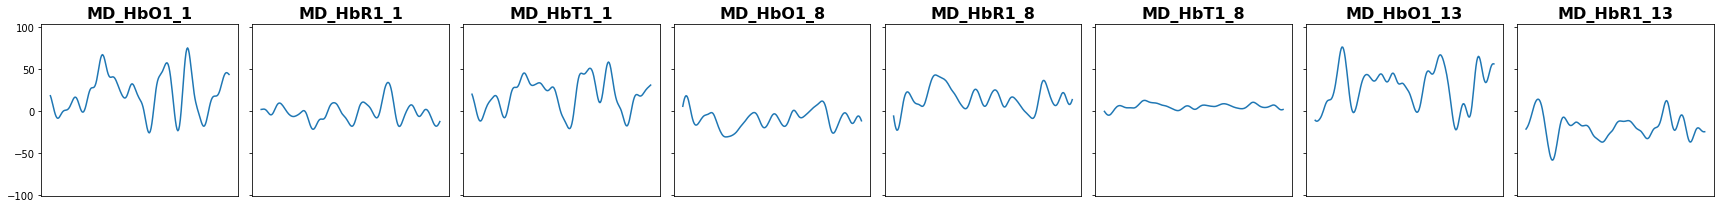

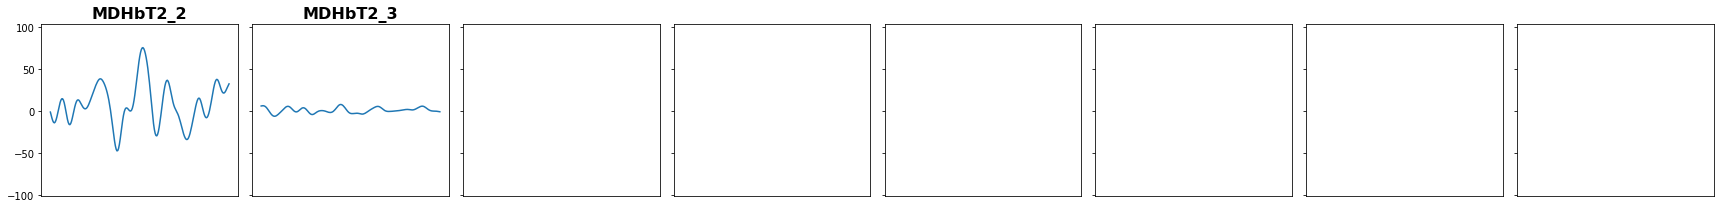

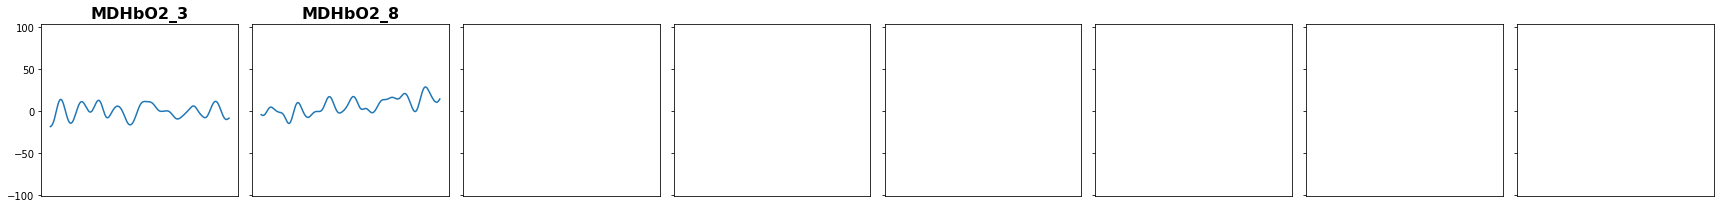

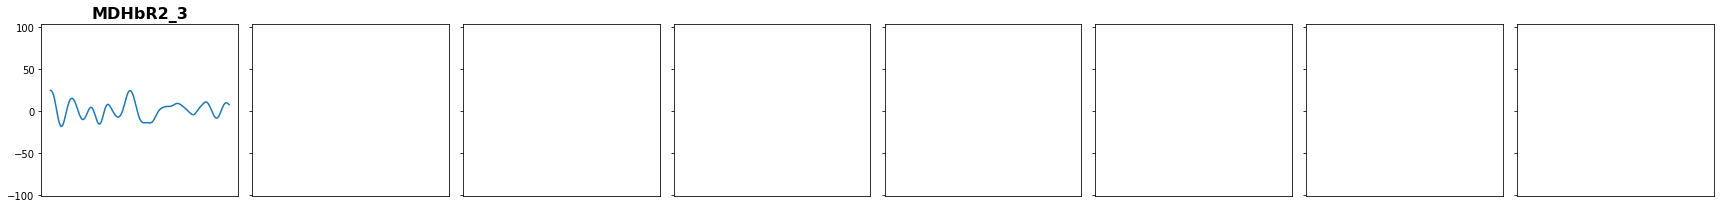

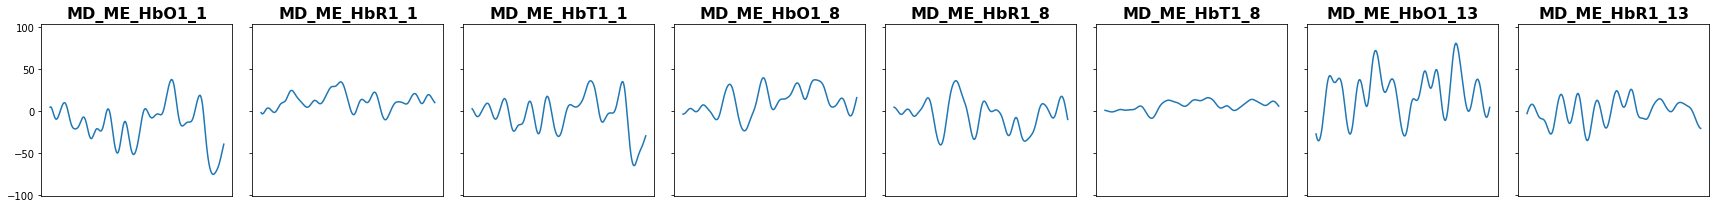

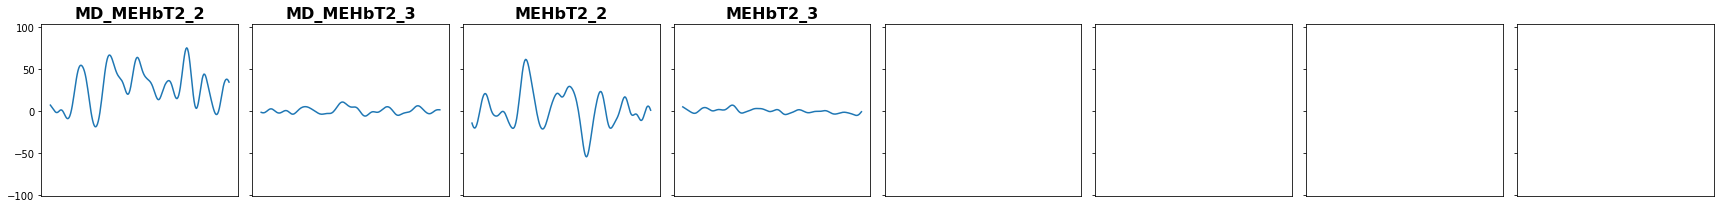

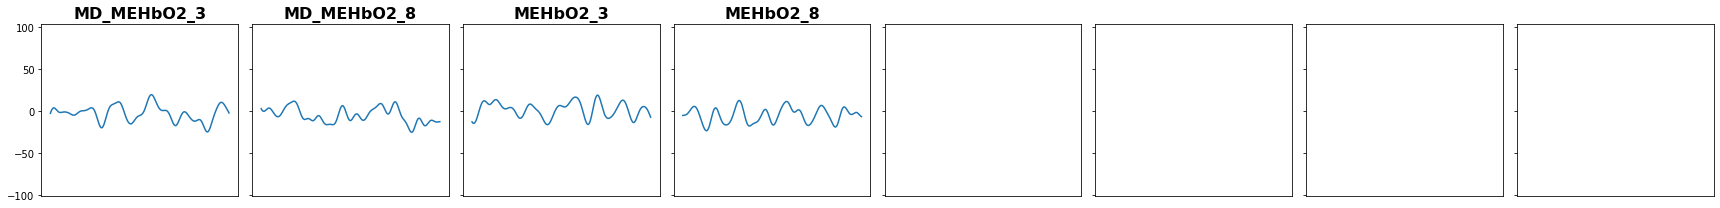

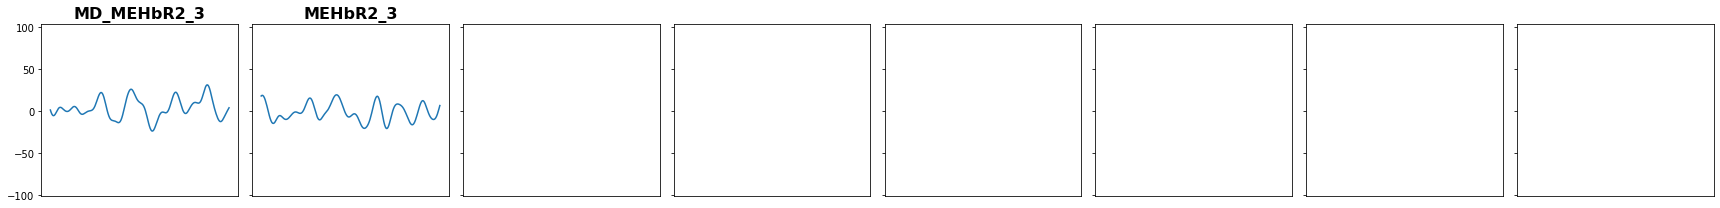

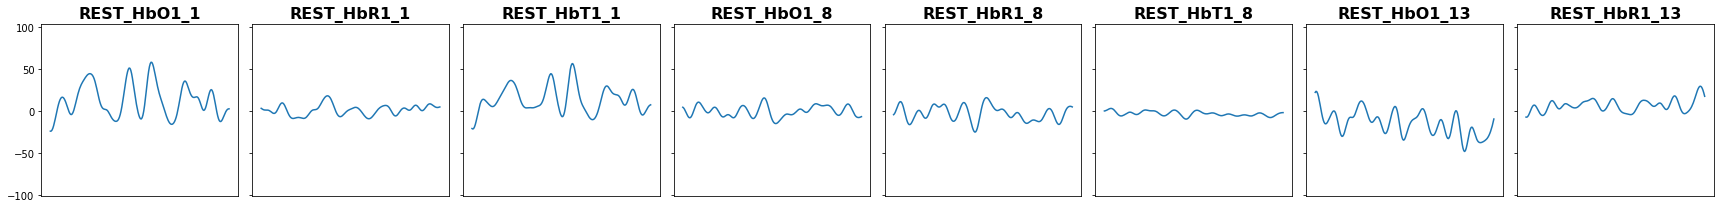

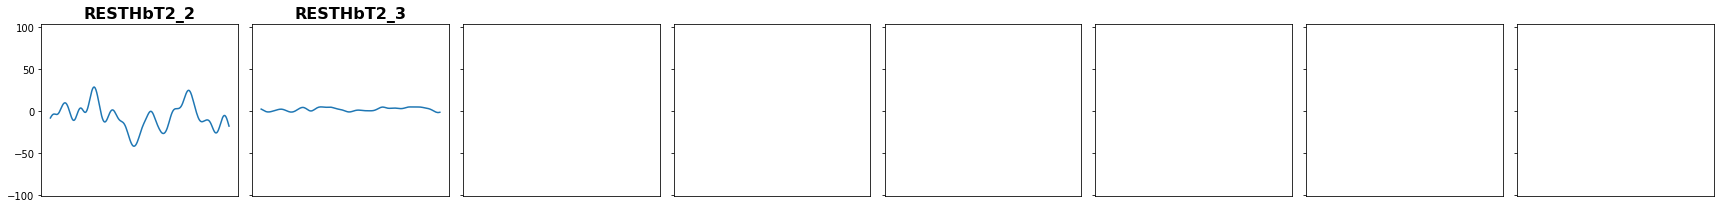

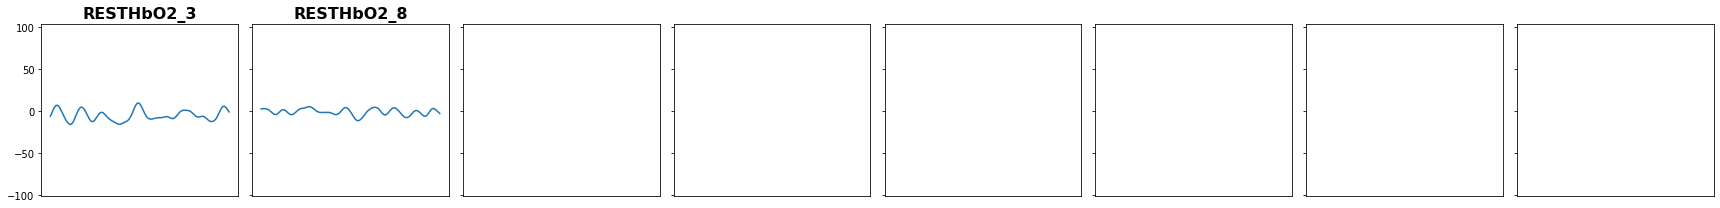

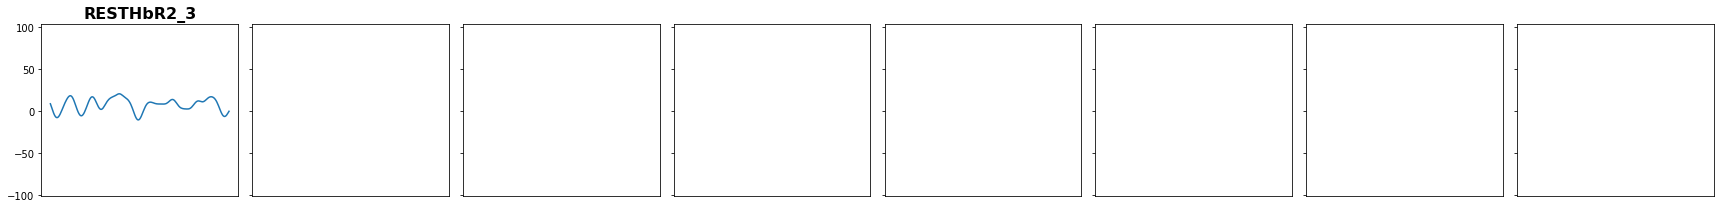

In [35]:
for s in summary_prefix_channels.keys(): 
  fig, ax = plt.subplots(nrows=1, ncols=8, sharex=True, sharey=True,figsize=(24,3))
  i = 0
  for c in summary_prefix_channels_list[s]:
    ax[i].plot(df.index, df[c])
    ax[i].set_title(c, fontsize=16, weight='bold')
    i = i + 1
    plt.xticks([])
    plt.ylim([min_measure, max_measure])

    if i >= 8: 
      print('Warning: Há mais de 8 detectores para a mesma fonte')
      break
 
  plt.tight_layout()
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


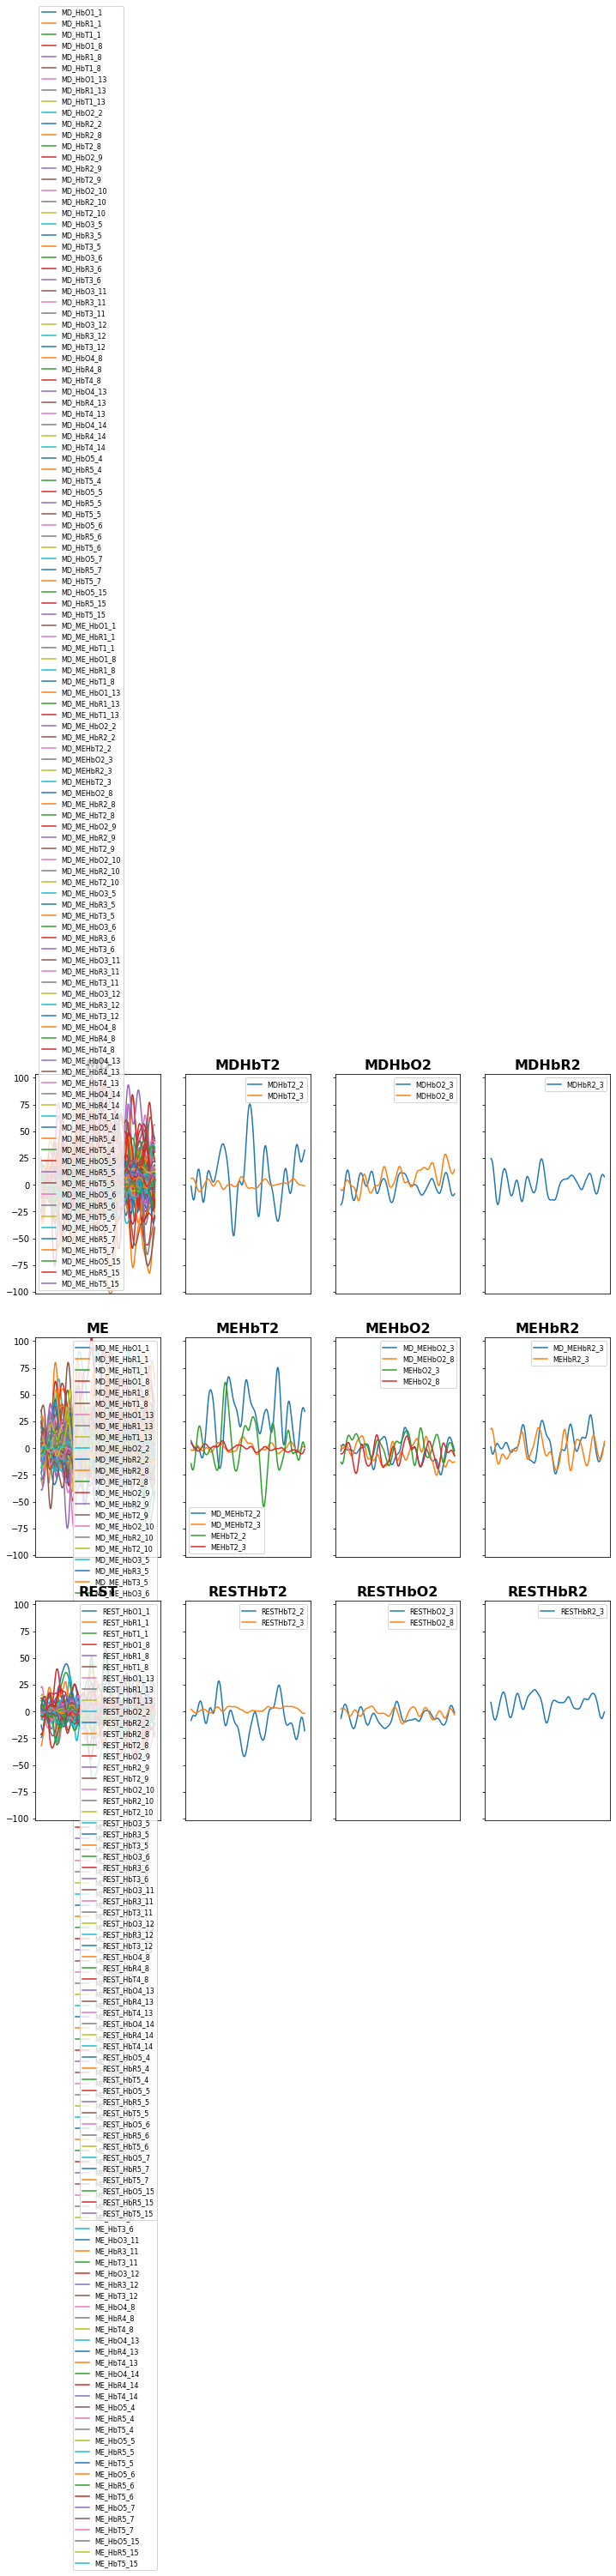

In [36]:
colunas = 4
linhas = int( len( summary_prefix_channels.keys() ) / colunas )

fig, ax = plt.subplots(nrows=linhas, ncols=colunas, sharex=True, sharey=True,figsize=(4*linhas,4*colunas))
i = 0
for s in summary_prefix_channels.keys(): 
  for c in summary_prefix_channels_list[s]:
    ax[i//colunas, i%colunas].plot(df.index, df[c], label=c)
  ax[i//colunas, i%colunas].set_title(s, fontsize=16, weight='bold')
  ax[i//colunas, i%colunas].legend(fontsize=8)
  plt.xticks([])
  plt.ylim([min_measure, max_measure])
  i = i + 1 
  
plt.tight_layout()
plt.show()

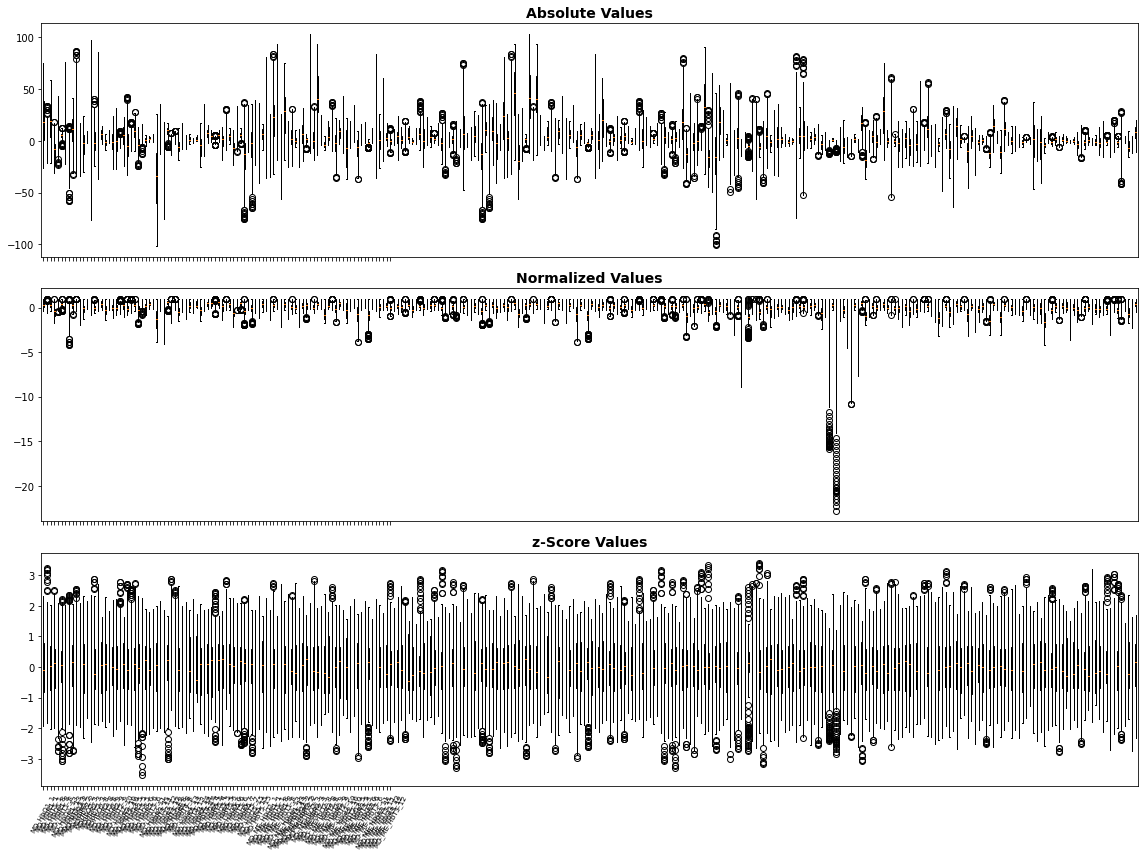

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(16,12))

i = 0
for s in summary_prefix_channels.keys(): 
  for c in summary_prefix_channels_list[s]:
    ax[0].boxplot(df[c], positions=[i])
    ax[1].boxplot(df[c] / df[c].max(), positions=[i])
    ax[2].boxplot(( df[c] - df[c].mean() ) / df[c].std(), positions=[i])
    i = i + 1

ax[0].set_title('Absolute Values',fontsize=14,weight='bold')    
ax[1].set_title('Normalized Values',fontsize=14,weight='bold') 
ax[2].set_title('z-Score Values',fontsize=14,weight='bold') 

ax[2].set_xticks(ticks=np.arange(0,96))
ax[2].set_xticklabels(labels=df.columns[1::],rotation=60,fontsize=7)

plt.tight_layout()
plt.show()

Entre com um conjunto de canais ou enter para o primeiro conjunto: 


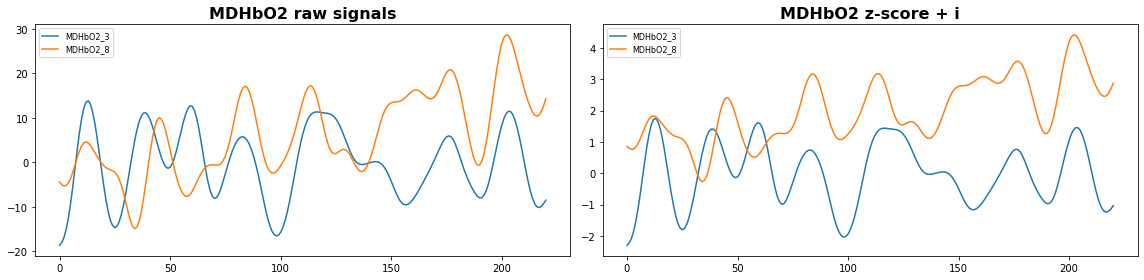

In [41]:
s = input('Entre com um conjunto de canais ou enter para o primeiro conjunto: ')
if s == '': s = 'MDHbO2' # list( summary_prefix_channels.keys() )[0]

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16,4))

i = 0
for c in summary_prefix_channels_list[s]:
  ax[0].plot(df.index, df[c] , label=c)
  ax[1].plot(df.index, ( df[c] - df[c].mean() ) / df[c].std() + i*2, label=c)
  i = i + 1

ax[0].set_title(s + ' raw signals', fontsize=16, weight='bold')
ax[0].legend(fontsize=8)

ax[1].set_title(s + ' z-score + i', fontsize=16, weight='bold')
ax[1].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Obtendo os eventos



# **TO DO**

> * Verificar como obter os eventos do Excel